In [1]:
import ROOT as r
import math
import numpy as np
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)

Welcome to JupyROOT 6.12/06


In [2]:
filewindow = r.TFile("./FourierWiggle_output_Window.root")
filenowindow = r.TFile("./FourierWiggle_output_noWindow.root")

In [3]:
#filewindow.ls()
filewindow.cd()

True

In [4]:
def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]
r.TFile.GetKeyNames = GetKeyNames

keyList = filewindow.GetKeyNames("")
print ("\nKeys in file:", keyList)


Keys in file: ['time0_window', 'time1_window', 'time2_window', 'time3_window', 'time4_window', 'time5_window', 'time6_window', 'time7_window', 'time8_window', 'time9_window', 'time10_window', 'time11_window', 'time12_window', 'time13_window', 'time14_window', 'time15_window', 'time16_window', 'time17_window', 'time18_window', 'time19_window', 'time20_window', 'time21_window', 'time22_window', 'time23_window', 'time24_window', 'time25_window', 'time26_window', 'time27_window', 'time28_window', 'time29_window', 'time30_window', 'time31_window', 'time32_window', 'time33_window', 'time34_window', 'time35_window', 'time36_window', 'time37_window', 'time38_window', 'time39_window', 'time40_window', 'time41_window', 'time42_window', 'time43_window', 'time44_window', 'time45_window', 'time46_window', 'time47_window']


In [5]:
def peak_fit(x, p):
    return p[0]*r.TMath.Exp(-0.5*((x[0]-p[1])/p[2])*((x[0]-p[1])/p[2])) + p[3] + p[4]*r.TMath.Exp(-p[5]*x[0])
def peak_fit_simple(x, p):
    return p[0]*r.TMath.Exp(-0.5*((x[0]-p[1])/p[2])*((x[0]-p[1])/p[2])) + p[3]
def peak_fit_bw(x, p):
    return p[0]*r.TMath.BreitWigner(x[0],p[1],p[2]) + p[3]

In [6]:
'''
func = r.TF1("func", peak_fit_simple, .22,.25,4)
func.SetParNames('A','Mean','#sigma','+ C')
func.SetParameters(.0001,.23,.1,0)
func.SetLineColor(2)
func.SetNpx(1000)
'''

'\nfunc = r.TF1("func", peak_fit_simple, .22,.25,4)\nfunc.SetParNames(\'A\',\'Mean\',\'#sigma\',\'+ C\')\nfunc.SetParameters(.0001,.23,.1,0)\nfunc.SetLineColor(2)\nfunc.SetNpx(1000)\n'

In [7]:
func = r.TF1("func", peak_fit_bw, .22,.27,4)
func.SetParNames('A','Mean','#gamma','+ C')
func.SetParameters(.0001,.23,.1,0)
func.SetParLimits(1,.22,.25)
func.SetLineColor(2)
func.SetNpx(1000)

In [8]:
'''
func = r.TF1("func", peak_fit, .22,.26,6)
func.SetParNames('A','Mean','#sigma','+ C', '+ D','e^(-E*x)' )
func.SetParameters(.0001,.23,.1,0,0,-1)
func.SetParLimits(0,0,1)
func.SetParLimits(1,.22,.25)
func.SetLineColor(2)
func.SetNpx(1000)
'''

'\nfunc = r.TF1("func", peak_fit, .22,.26,6)\nfunc.SetParNames(\'A\',\'Mean\',\'#sigma\',\'+ C\', \'+ D\',\'e^(-E*x)\' )\nfunc.SetParameters(.0001,.23,.1,0,0,-1)\nfunc.SetParLimits(0,0,1)\nfunc.SetParLimits(1,.22,.25)\nfunc.SetLineColor(2)\nfunc.SetNpx(1000)\n'

In [9]:
meanlist_noWindow = []
stdlist_noWindow = []
meanlist_window = []
stdlist_window = []

0.22996142670161443 0.00801117158319739
0.22998802308553115 0.008082040183385195
0.22998424900243328 0.008147969893700216
0.22995068104740302 0.008207661319249451
0.22989285508720778 0.008233215247702874
0.22982887212755765 0.008230318742994916
0.22976901777571407 0.00820186533623056
0.22972125730741846 0.008149232912599641
0.2296864741851307 0.008089106094516074
0.22966884455220565 0.008023453969588673
0.22967303417549362 0.007961241716418613
0.2296962751006045 0.007908889304127004
0.2297398784189009 0.007874478141375596
0.2298007807127535 0.007840335430087525
0.22986852190024037 0.007842301252669881
0.22993651471043292 0.007881244196611473
0.22998987307222715 0.007954064648252004
0.23001461847915813 0.008037460178369121
0.23000562042792028 0.00810399772286989
0.2299680867944396 0.008150186759711561
0.22990564095099958 0.008173751851921165
0.22982554882161482 0.008166752224324211
0.229754590920995 0.008132430775782934
0.2296987850896318 0.008076409970017628
0.22966554838297823 0.00801

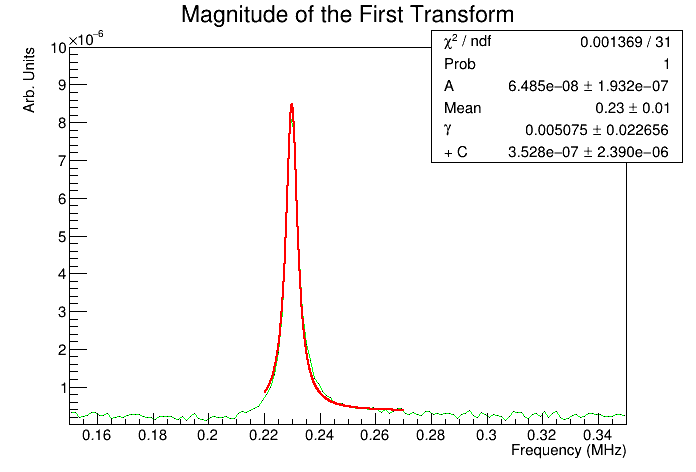

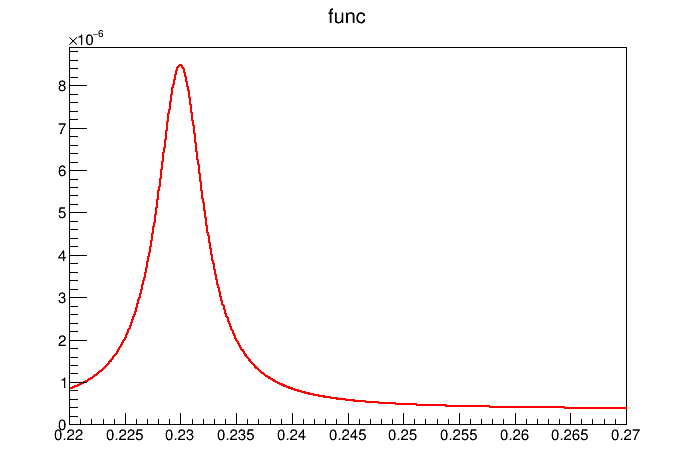

In [10]:
#for i in range(0,1):
for i in range(0,len(keyList)):
    ding = r.TH1D()
    filewindow.GetObject(keyList[i], ding)
    c = r.TCanvas()
#    c.SetLogy()
    ding.Draw("HIST P0 L")
    ding.GetXaxis().SetRangeUser(.15,.35)
    ding.GetYaxis().SetRangeUser(0.000000001,.00001)
    ding.Fit("func","REMB")
    func.Draw("SAME")
    c.Draw()
    c2 = r.TCanvas()
    func.Draw()
    meanlist_window.append(func.GetParameter(1))
    stdlist_window.append(func.GetParError(1))
    print(func.GetParameter(1), func.GetParError(1))
    c2.Draw()

In [11]:
print(meanlist_window)

[0.22996142670161443, 0.22998802308553115, 0.22998424900243328, 0.22995068104740302, 0.22989285508720778, 0.22982887212755765, 0.22976901777571407, 0.22972125730741846, 0.2296864741851307, 0.22966884455220565, 0.22967303417549362, 0.2296962751006045, 0.2297398784189009, 0.2298007807127535, 0.22986852190024037, 0.22993651471043292, 0.22998987307222715, 0.23001461847915813, 0.23000562042792028, 0.2299680867944396, 0.22990564095099958, 0.22982554882161482, 0.229754590920995, 0.2296987850896318, 0.22966554838297823, 0.22964576902138267, 0.22965235408444845, 0.22968354230531102, 0.22973305094453686, 0.2298065020804899, 0.229884875376238, 0.22995669279295952, 0.2300135514697017, 0.23003909714324428, 0.23002241364435078, 0.22997684636013166, 0.2299004815866811, 0.22981603864919306, 0.22974207075910247, 0.2296848201765556, 0.22964499558958434, 0.22963046781078195, 0.22964368726491954, 0.2296805027718996, 0.22974031878830029, 0.22982218381549682, 0.22990275375960956, 0.22998474265107868]


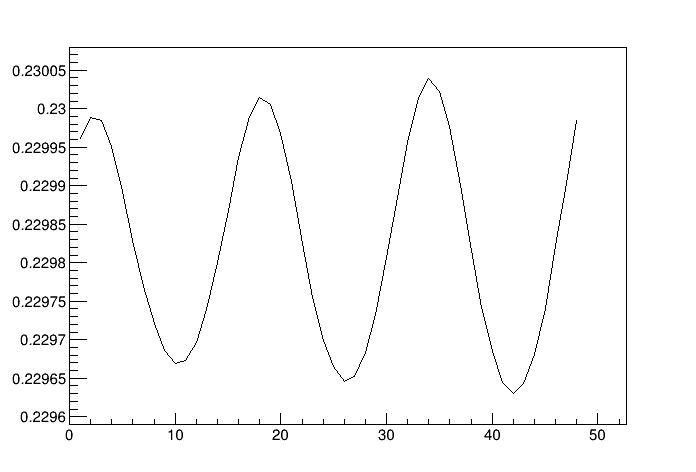

In [12]:
gr = r.TGraphErrors()

for i in range(0,len(meanlist_window)):
#    print(i, meanlist_window[i])
    gr.SetPoint(i,i+1,meanlist_window[i])
#    gr.SetPointError(i,0,stdlist_window[i])
    
c = r.TCanvas()
gr.Draw()
c.Draw()

In [13]:
filenowindow.cd()
keyListNoWindow = filenowindow.GetKeyNames("")
print ("\nKeys in file:", keyListNoWindow)


Keys in file: ['time0_noWindow', 'time1_noWindow', 'time2_noWindow', 'time3_noWindow', 'time4_noWindow', 'time5_noWindow', 'time6_noWindow', 'time7_noWindow', 'time8_noWindow', 'time9_noWindow', 'time10_noWindow', 'time11_noWindow', 'time12_noWindow', 'time13_noWindow', 'time14_noWindow', 'time15_noWindow', 'time16_noWindow', 'time17_noWindow', 'time18_noWindow', 'time19_noWindow', 'time20_noWindow', 'time21_noWindow', 'time22_noWindow', 'time23_noWindow', 'time24_noWindow', 'time25_noWindow', 'time26_noWindow', 'time27_noWindow', 'time28_noWindow', 'time29_noWindow', 'time30_noWindow', 'time31_noWindow', 'time32_noWindow', 'time33_noWindow', 'time34_noWindow', 'time35_noWindow', 'time36_noWindow', 'time37_noWindow', 'time38_noWindow', 'time39_noWindow', 'time40_noWindow', 'time41_noWindow', 'time42_noWindow', 'time43_noWindow', 'time44_noWindow', 'time45_noWindow', 'time46_noWindow', 'time47_noWindow']


0.23048437524477794 0.006423558379109573
0.23064131832187737 0.006626879604969715
0.23068205033436856 0.006776156074220982
0.23055337791504 0.006792711653839614
0.23026320350191692 0.006711407210730977
0.22990577275852728 0.006636861882991549
0.22956232154068293 0.006587409115190859
0.22929759326330743 0.00652850770314127
0.22913503464288262 0.0064592146812153806
0.22908344009622109 0.006431843821593189
0.22913913044094583 0.006331417182016158
0.22927466615758454 0.006234278538495411
0.22947821957618023 0.006164012151144205
0.22972056549775705 0.006131938451998456
0.22999277400796964 0.006160033779439286
0.2302729794652836 0.006275615310080931
0.23051275908353783 0.006470775629818917
0.23066080850278628 0.006685447316671214
0.23067764868708057 0.00681689787281857
0.23054881314696304 0.006818824452905006
0.2302705825006845 0.006728275227232544
0.22988529661218857 0.0066410717478238845
0.2295282305715366 0.006586118789788389
0.2292638130432576 0.006522307630534491
0.22912030788184518 0.0

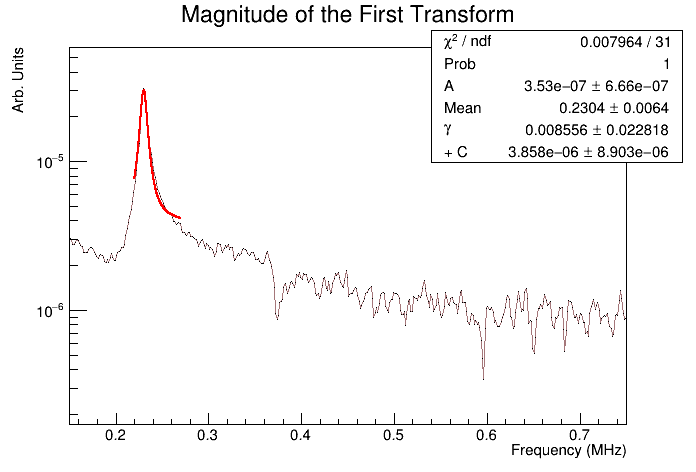

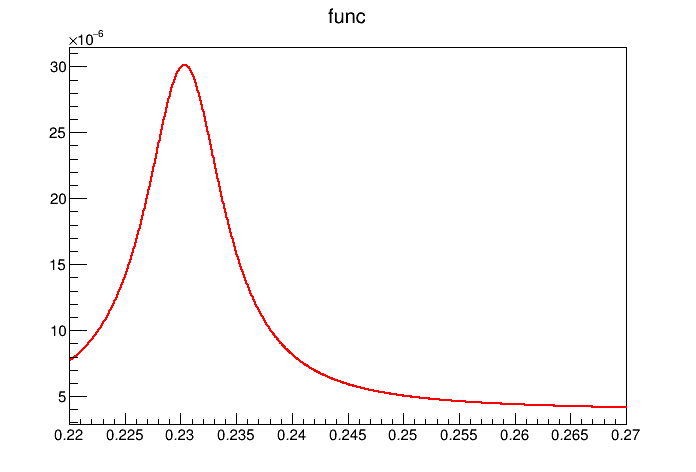

In [14]:
for i in range(0,len(keyListNoWindow)):
    ding = r.TH1D()
    filenowindow.GetObject(keyListNoWindow[i], ding)
    c = r.TCanvas()
    c.SetLogy()
    ding.Draw("HIST P0 L")
    ding.GetXaxis().SetRangeUser(.15,.75)
    ding.Fit("func","REM")
    func.Draw("SAME")
    c.Draw()
    c2 = r.TCanvas()
    func.Draw()
    meanlist_noWindow.append(func.GetParameter(1))
    stdlist_noWindow.append(func.GetParError(1))
    print(func.GetParameter(1), func.GetParError(1))
    c2.Draw()

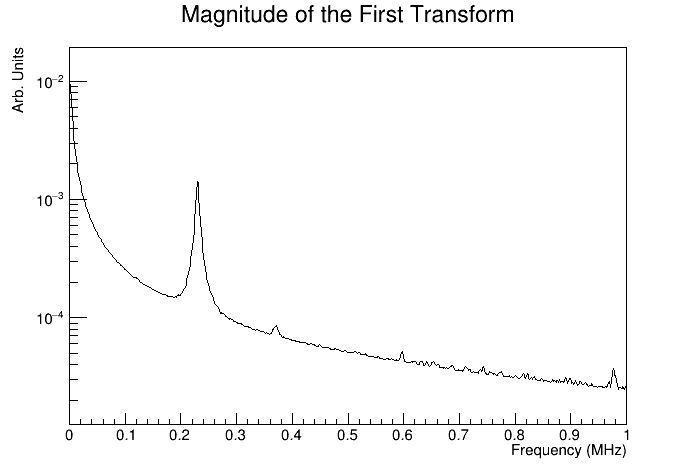

In [15]:
h = r.TH1D()
filenowindow.GetObject(keyListNoWindow[0], h)
for i in range(1,len(keyListNoWindow)):
    ding = r.TH1D()
    filenowindow.GetObject(keyListNoWindow[i], ding)
    h.Add(ding)
c = r.TCanvas()
c.SetLogy()
h.Draw("HIST P0 L")
h.GetXaxis().SetRangeUser(0,1)
c.Draw()

0.22986680083306538 0.0009462218811628759
 FCN=0.187625 FROM MINOS     STATUS=SUCCESSFUL     82 CALLS        2182 TOTAL
                     EDM=2.82538e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.80581e-05   4.53493e-06   1.84987e-07  -5.63832e+02
   2  Mean         2.29867e-01   9.46222e-04   2.44561e-04  -5.39209e-03
   3  #gamma       9.32313e-03   3.36962e-03   1.30728e-04  -6.78699e-01
   4  + C          1.12669e-04   5.26950e-05   5.26950e-05   1.21841e-01


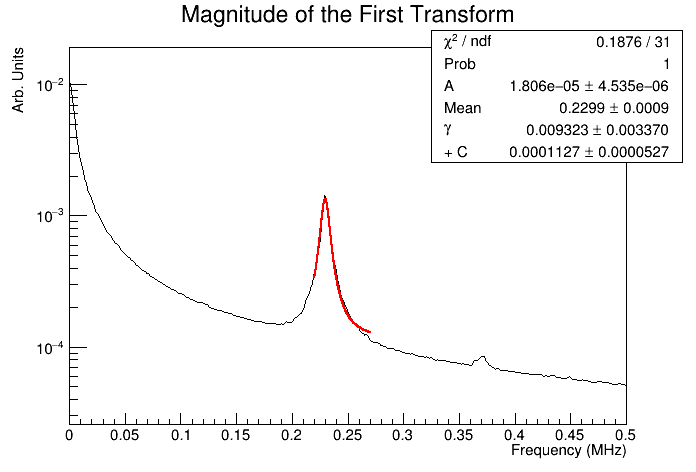

In [16]:
c = r.TCanvas()
c.SetLogy()
h.Draw("HIST P0 L")
h.GetXaxis().SetRangeUser(0,.5)
h.Fit("func","REM")
func.Draw("SAME")
c.Draw()

print(func.GetParameter(1), func.GetParError(1))

sum_mean = func.GetParameter(1)

In [17]:
outfile = r.TFile("output.root","RECREATE")
outfile.cd()
c.Write()
outfile.Close()

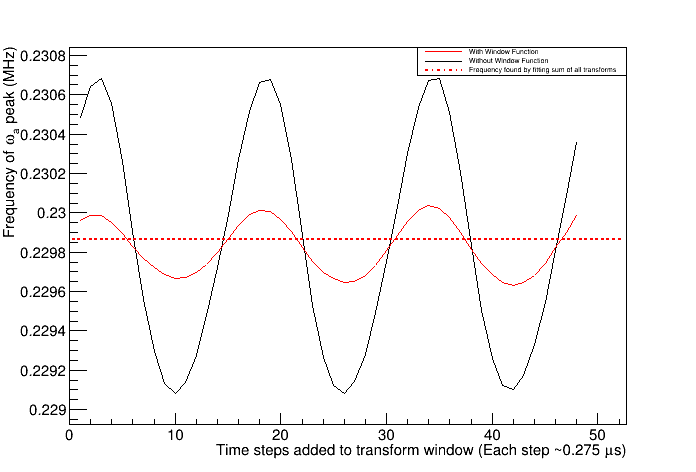

In [18]:
gr2 = r.TGraphErrors()

for i in range(0,len(meanlist_noWindow)):
#    print(i, meanlist_window[i])
    gr2.SetPoint(i,i+1,meanlist_noWindow[i])
#    gr2.SetPointError(i,0,stdlist_noWindow[i])
    
c = r.TCanvas()
gr2.GetXaxis().SetTitle("Time steps added to transform window (Each step ~0.275 #mus)")
gr2.GetYaxis().SetTitle("Frequency of #omega_{a} peak (MHz)")
gr2.GetYaxis().SetTitleOffset(1.5)
gr2.Draw()

gr.SetMarkerColor(2)
gr.SetLineColor(2)
gr.Draw("SAME")

meanfunc = r.TF1("meanfunc",str(sum_mean),0,100)
meanfunc.SetLineStyle(4)
meanfunc.Draw("SAME")

leg = r.TLegend(0.6,0.84,0.9,0.9)
leg.AddEntry(gr,"With Window Function","pl")
leg.AddEntry(gr2,"Without Window Function","pl")
leg.AddEntry(meanfunc,"Frequency found by fitting sum of all transforms","l")
leg.Draw()


c.Draw()

In [19]:
print(meanlist_noWindow)
import matplotlib.pyplot as plt
plt.plot(meanlist_noWindow)
plt.plot(meanlist_window)
plt.ylabel('some numbers')
plt.show()

[0.23048437524477794, 0.23064131832187737, 0.23068205033436856, 0.23055337791504, 0.23026320350191692, 0.22990577275852728, 0.22956232154068293, 0.22929759326330743, 0.22913503464288262, 0.22908344009622109, 0.22913913044094583, 0.22927466615758454, 0.22947821957618023, 0.22972056549775705, 0.22999277400796964, 0.2302729794652836, 0.23051275908353783, 0.23066080850278628, 0.23067764868708057, 0.23054881314696304, 0.2302705825006845, 0.22988529661218857, 0.2295282305715366, 0.2292638130432576, 0.22912030788184518, 0.22908294532281884, 0.2291454719323645, 0.22928283003206232, 0.2294922928986148, 0.22975203188087734, 0.23003289955527007, 0.23030409030918103, 0.23053665638866247, 0.23067511717178255, 0.23068053542228656, 0.2305122146446972, 0.2302064226732389, 0.22983459187337946, 0.22950458882641764, 0.2292618464424269, 0.2291246869908082, 0.22910045243168561, 0.2291743663721639, 0.22932975863751362, 0.2295466894950747, 0.2298083646129933, 0.23008895313786967, 0.23035919986452397]


<Figure size 640x480 with 1 Axes>

 FCN=2.4077 FROM MIGRAD    STATUS=CALL LIMIT   1489 CALLS        1490 TOTAL
                     EDM=0.000161386    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  14.8 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            6.72436e-03   1.54504e-02   1.43902e-04  -2.72677e+01
   2  Mean        -9.11716e-03   1.28903e-03   5.55817e-05  -1.91068e+00
   3  #gamma       9.29920e-04   2.20523e-03  -2.11344e-05  -1.90207e+02
   4  + C          1.69517e-04   3.36039e-05   1.86604e-07   5.50850e+01
 FCN=0.00171074 FROM MINOS     STATUS=SUCCESSFUL     41 CALLS        1451 TOTAL
                     EDM=3.34883e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -8.73670e+00   3.65043e+00   8.43425e-02   7.74227e-03
   2  Slope       

Warning in <Fit>: Abnormal termination of minimization.


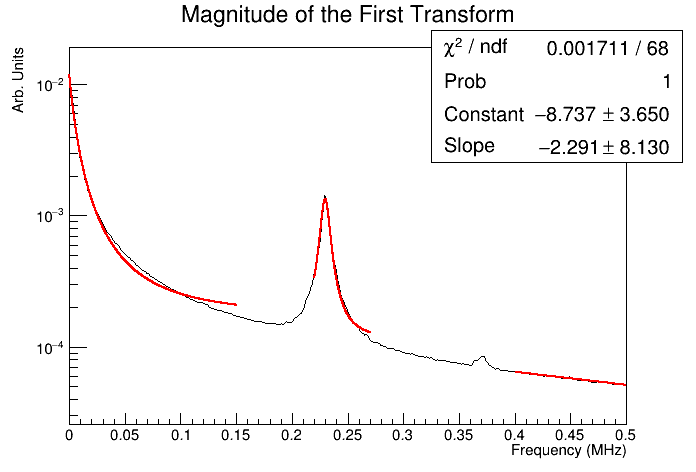

In [20]:
func2 = r.TF1("func2", peak_fit_bw, 0,.15,4)
func2.SetParNames('A','Mean','#gamma','+ C')
func2.SetParameters(.0001,.001,.1,0)
func2.SetParLimits(1,-0.1,0.1)
func2.SetLineColor(2)
func2.SetNpx(1000)

func3 = r.TF1("func3","expo",.4,.5)

c = r.TCanvas()
c.SetLogy()
h3 = h.DrawClone()
h3.Draw("HIST P0 L")
h3.Fit("func2","REMB")

h3.Fit("func3","REMB")

func2.Draw("SAME")
func.Draw("SAME")
func3.Draw("SAME")
c.Draw()

 FCN=0.168157 FROM MINOS     STATUS=SUCCESSFUL     82 CALLS         640 TOTAL
                     EDM=1.63377e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.77704e-05   4.48572e-06   1.78735e-07  -5.39309e+02
   2  Mean         2.29873e-01   9.45539e-04   2.48311e-04  -5.33708e-03
   3  #gamma       9.19271e-03   3.33691e-03   1.26398e-04  -6.59935e-01
   4  + C          2.49885e-05   5.23591e-05   5.23591e-05   1.26563e-01


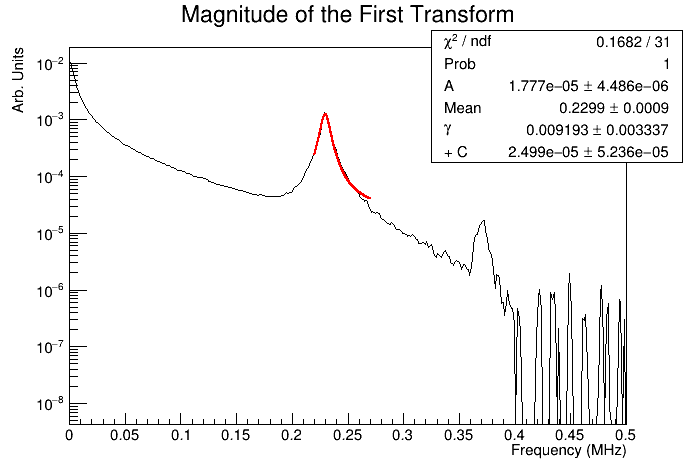

In [21]:
h4 = h.DrawClone()
c4 = r.TCanvas()
c4.SetLogy()

for i in range(0,h4.GetNbinsX()-2):
    bincenter = h4.GetBinCenter(i)
    bincontent = h4.GetBinContent(i)
    dong = bincontent - func3.Eval(bincenter)
    h4.SetBinContent(i,dong)

h4.Draw("HIST P0 L")
h4.Fit("func","REMB")
func.Draw("SAME")
c4.Draw()

 FCN=0.783925 FROM MINOS     STATUS=SUCCESSFUL     22 CALLS         522 TOTAL
                     EDM=4.26117e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{background}   1.67991e-04   1.10618e-05   6.81577e-08   1.57566e+02
   2  k_{background}   2.38068e-03   3.68831e-04   3.28157e-06  -3.30934e+00
   3  +C_{background}  -3.39848e-06   1.26360e-05   1.26360e-05  -7.57831e-03


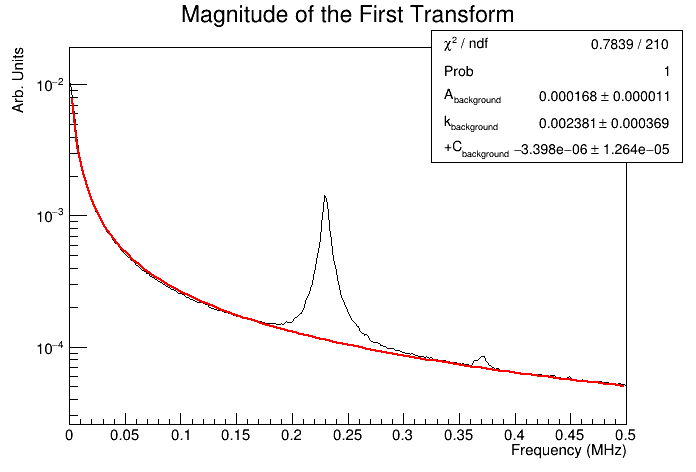

In [56]:
'''
Double_t fline(Double_t *x, Double_t *par)
{
    if (reject && x[0] > 2.5 && x[0] < 3.5) {
      TF1::RejectPoint();
      return 0;
   }
   return par[0] + par[1]*x[0];
}
'''
h4 = h.DrawClone()

reject = True

def fbackground(x, p):
    if(reject and not((x[0]>0 and x[0]<0.155) or (x[0]>0.30 and x[0]<0.35) or (x[0]>0.4 and x[0]<0.5) or (x[0]>0.6 and x[0]<3))):
        r.TF1.RejectPoint()
        return 0
#    return p[0]*r.TMath.Exp(p[1]*x[0] + r.TMath.Exp(p[2]*x[0])) + p[3]
    return p[0]*r.TMath.Sqrt(p[1]*p[1] + x[0]*x[0]) / (2 * r.TMath.Pi() * r.TMath.Abs(p[1]*p[1] + x[0]*x[0])) + p[2]

def fsignal1(x, p):
    if(reject and not((x[0]>0 and x[0]<0.155) or (x[0]>0.30 and x[0]<0.35) or (x[0]>0.4 and x[0]<0.5) or (x[0]>0.6 and x[0]<3))):
        r.TF1.RejectPoint()
        return 0
#    return p[0]*r.TMath.Exp(p[1]*x[0] + r.TMath.Exp(p[2]*x[0])) + p[3]
    return p[0]*r.TMath.Sqrt(p[1]*p[1] + x[0]*x[0]) / (2 * r.TMath.Pi() * r.TMath.Abs(p[1]*p[1] + x[0]*x[0])) + p[2]

fl = r.TF1("fl",fbackground,0,3,3)
fl.SetParameters(0.03,0,0)
fl.SetParNames("A_{background}","k_{background}","+C_{background}")
h4.Fit(fl,"REMB")

reject = False

#fl.SetParameter(2,-10.5)

c4 = r.TCanvas()
c4.SetLogy()

h4.GetXaxis().SetRangeUser(0,0.5)
#h4.GetYaxis().SetRangeUser(0.0000001,100)


h4.Draw("HIST P0 L")
fl.Draw("SAME")
c4.Draw()

 FCN=0.000483494 FROM MIGRAD    STATUS=CALL LIMIT   1350 CALLS        1351 TOTAL
                     EDM=3.25003e-05    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A_{signal}   1.71006e-03   9.15715e-03  -5.95833e-06   7.40646e+00
   2  k_{signal}   2.99887e-01   1.90865e-01  -8.70165e-03   1.45578e-04
   3  +C_{signal}  -8.09862e-04   3.93626e-03   3.87886e-06   1.09790e+01


Warning in <Fit>: Abnormal termination of minimization.


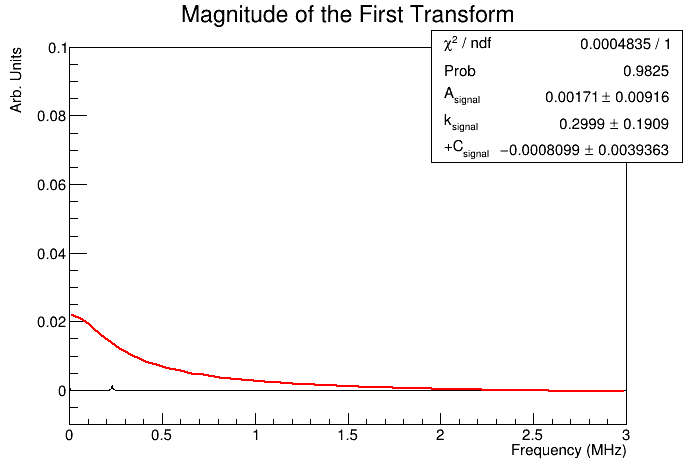

In [88]:
h5 = h.DrawClone()
c5 = r.TCanvas()
#c5.SetLogy()

for i in range(0,h5.GetNbinsX()-2):
    bincenter = h5.GetBinCenter(i)
    bincontent = h5.GetBinContent(i)
    dong = bincontent - fl.Eval(bincenter) 
    h5.SetBinContent(i,dong)

h5.GetXaxis().SetRangeUser(0,3)
    
reject = True

def fsignal1(x, p):
    if(reject and (x[0]>0.155 and x[0]<0.30)):
        r.TF1.RejectPoint()
        return 0
    return p[0] * r.TMath.Sqrt(p[1]*p[1] + x[0]*x[0]) / (2 * r.TMath.Pi() * r.TMath.Abs(p[1]*p[1] + x[0]*x[0])) + p[2]

fsig = r.TF1("fsig",fsignal1,0.15,0.3,3)
fsig.SetParameters(.03,0.2,-0.002)
fsig.SetParLimits(0,0,1000)
fsig.SetParLimits(1,0.1,0.3)
fsig.SetParNames("A_{signal}","k_{signal}","+C_{signal}")
h5.Fit(fsig,"REMB")

reject = False
    
fsig.SetParameters(.03,0.2,-0.002)
    
h5.GetXaxis().SetRangeUser(0,3)
h5.GetYaxis().SetRangeUser(-.01,.1)
fsig.SetRange(0,3)
    
h5.Draw("HIST P0 L")
fsig.Draw("SAME")
c5.Draw()

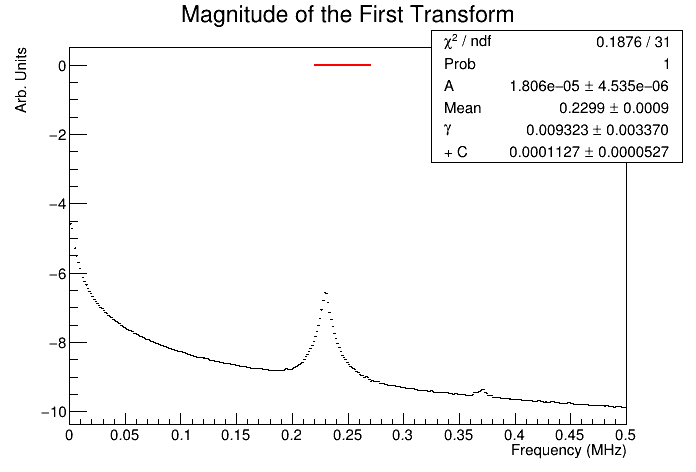

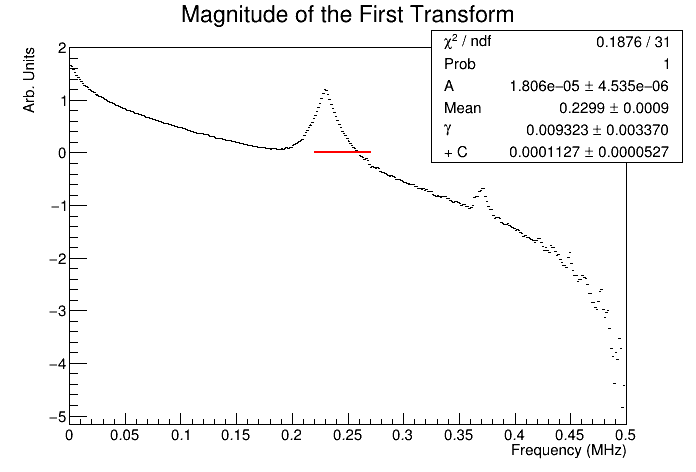

In [24]:
h2 = h.DrawClone()
c2 = r.TCanvas()
h2.Draw("HIST P0 L")
for i in range(0,h2.GetNbinsX()-2):
    ding = h2.GetBinContent(i)
    if ding>0:
        dong = np.log(ding)
    else:
        dong = 0
#    print(ding,dong)
    h2.SetBinContent(i,dong)
h2.DrawCopy()
c2.Draw()

offset = h2.GetBinContent(h2.GetMinimumBin())

c3 = r.TCanvas()
c3.cd()

for i in range(0,h2.GetNbinsX()-2):
    ding = h2.GetBinContent(i) - offset
    if ding>0:
        dong = np.log(ding)
    else:
        dong = 0
#    print(ding,dong)
    h2.SetBinContent(i,dong)

h2.Draw()
c3.Draw()